Before running this example please run `run_simulations.py` script to generate data.

In [2]:
import sys
!{sys.executable} -m pip install pandas

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
!{sys.executable} -m pip install seaborn

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
import glob
from itertools import product

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [5]:
matplotlib.rcParams.update({'font.size': 16})

In [6]:
def generate_plot(data):
    plt.figure(figsize = (5, 4), dpi=1000)

    sns.scatterplot(data = data, x = 'h', y = 'result', hue = 'p',
                    palette=sns.color_palette(['blue', 'green', 'red']))

    plt.ylabel('$\\bar{c}_{\\tau}$')
    plt.ylim(0, 1.05)
    plt.legend(loc = 'lower right')
    plt.tight_layout()

In [7]:
GRAPHS = ['lattice', 'complete', 'WS', 'BA']

P = [0.05, 0.1, 0.2]
F = [0.1]
Q = [4]
H = np.arange(0.04, 0.23, 0.01)

In [8]:
results = []

for graph, p, f, q, h in product(GRAPHS, P, F, Q, H):
    current_graph_path = f"{graph}/p-{p}/f-{f}/q-{q}/h-{h}"
    print(current_graph_path)
    current_graph_simulation = [(pd.read_csv(el).iloc[-1] == 1).mean() for el in glob.glob(f'results/simulations/{current_graph_path}/*.csv')]
    current_graph_simulation = np.mean(current_graph_simulation)
    res = {
        "graph": graph,
        "p": p,
        "f": f,
        "q": q,
        "h": h,
        "result": current_graph_simulation
    }
    results.append(res)

lattice/p-0.05/f-0.1/q-4/h-0.04
lattice/p-0.05/f-0.1/q-4/h-0.05
lattice/p-0.05/f-0.1/q-4/h-0.060000000000000005
lattice/p-0.05/f-0.1/q-4/h-0.07


C:\Users\Admin\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Admin\AppData\Local\Programs\Python\Python37-32\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


lattice/p-0.05/f-0.1/q-4/h-0.08000000000000002
lattice/p-0.05/f-0.1/q-4/h-0.09000000000000001
lattice/p-0.05/f-0.1/q-4/h-0.1
lattice/p-0.05/f-0.1/q-4/h-0.11000000000000001
lattice/p-0.05/f-0.1/q-4/h-0.12000000000000002
lattice/p-0.05/f-0.1/q-4/h-0.13000000000000003
lattice/p-0.05/f-0.1/q-4/h-0.14
lattice/p-0.05/f-0.1/q-4/h-0.15000000000000002
lattice/p-0.05/f-0.1/q-4/h-0.16000000000000003
lattice/p-0.05/f-0.1/q-4/h-0.17000000000000004
lattice/p-0.05/f-0.1/q-4/h-0.18000000000000002
lattice/p-0.05/f-0.1/q-4/h-0.19000000000000003
lattice/p-0.05/f-0.1/q-4/h-0.20000000000000004
lattice/p-0.05/f-0.1/q-4/h-0.21000000000000005
lattice/p-0.05/f-0.1/q-4/h-0.22000000000000006
lattice/p-0.1/f-0.1/q-4/h-0.04
lattice/p-0.1/f-0.1/q-4/h-0.05
lattice/p-0.1/f-0.1/q-4/h-0.060000000000000005
lattice/p-0.1/f-0.1/q-4/h-0.07
lattice/p-0.1/f-0.1/q-4/h-0.08000000000000002
lattice/p-0.1/f-0.1/q-4/h-0.09000000000000001
lattice/p-0.1/f-0.1/q-4/h-0.1
lattice/p-0.1/f-0.1/q-4/h-0.11000000000000001
lattice/p-0.1/f-0.

BA/p-0.2/f-0.1/q-4/h-0.05
BA/p-0.2/f-0.1/q-4/h-0.060000000000000005
BA/p-0.2/f-0.1/q-4/h-0.07
BA/p-0.2/f-0.1/q-4/h-0.08000000000000002
BA/p-0.2/f-0.1/q-4/h-0.09000000000000001
BA/p-0.2/f-0.1/q-4/h-0.1
BA/p-0.2/f-0.1/q-4/h-0.11000000000000001
BA/p-0.2/f-0.1/q-4/h-0.12000000000000002
BA/p-0.2/f-0.1/q-4/h-0.13000000000000003
BA/p-0.2/f-0.1/q-4/h-0.14
BA/p-0.2/f-0.1/q-4/h-0.15000000000000002
BA/p-0.2/f-0.1/q-4/h-0.16000000000000003
BA/p-0.2/f-0.1/q-4/h-0.17000000000000004
BA/p-0.2/f-0.1/q-4/h-0.18000000000000002
BA/p-0.2/f-0.1/q-4/h-0.19000000000000003
BA/p-0.2/f-0.1/q-4/h-0.20000000000000004
BA/p-0.2/f-0.1/q-4/h-0.21000000000000005
BA/p-0.2/f-0.1/q-4/h-0.22000000000000006


In [9]:
df = pd.DataFrame(results)

In [10]:
df['p'] = df['p'].astype(str)

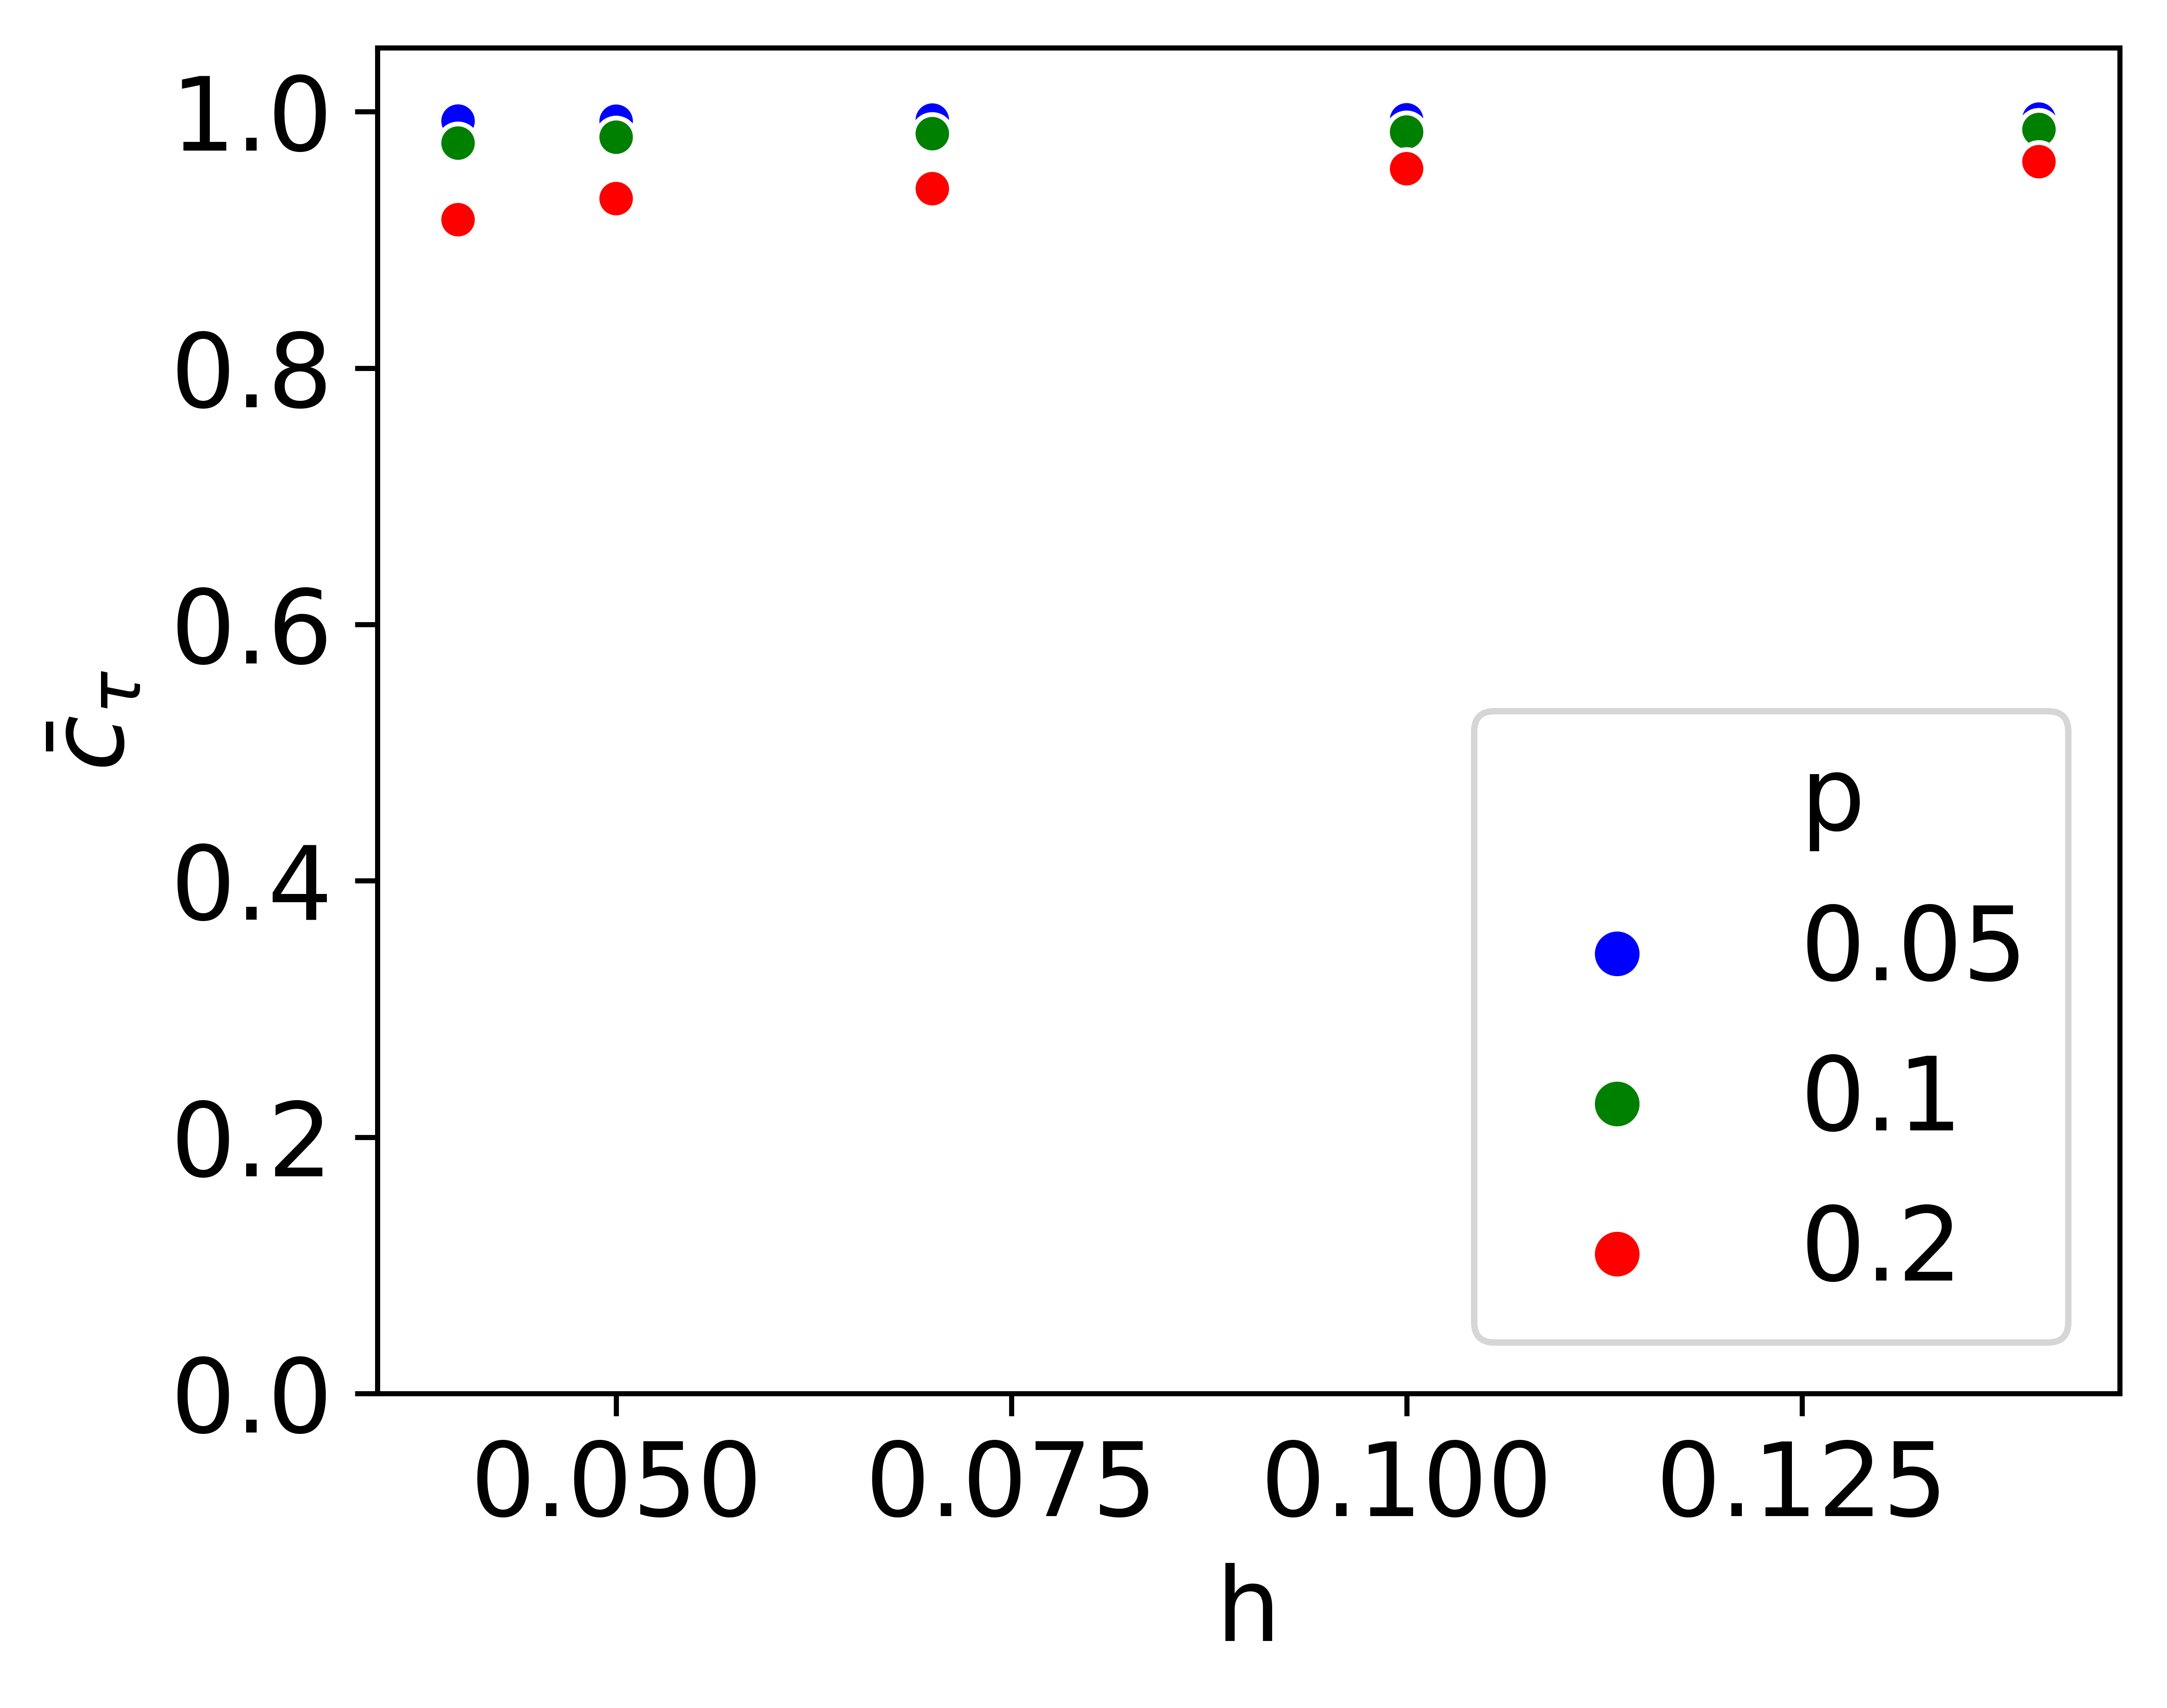

In [11]:
generate_plot(df[df['graph'] == 'lattice'])
plt.savefig('results/images/hp-lattice.png')

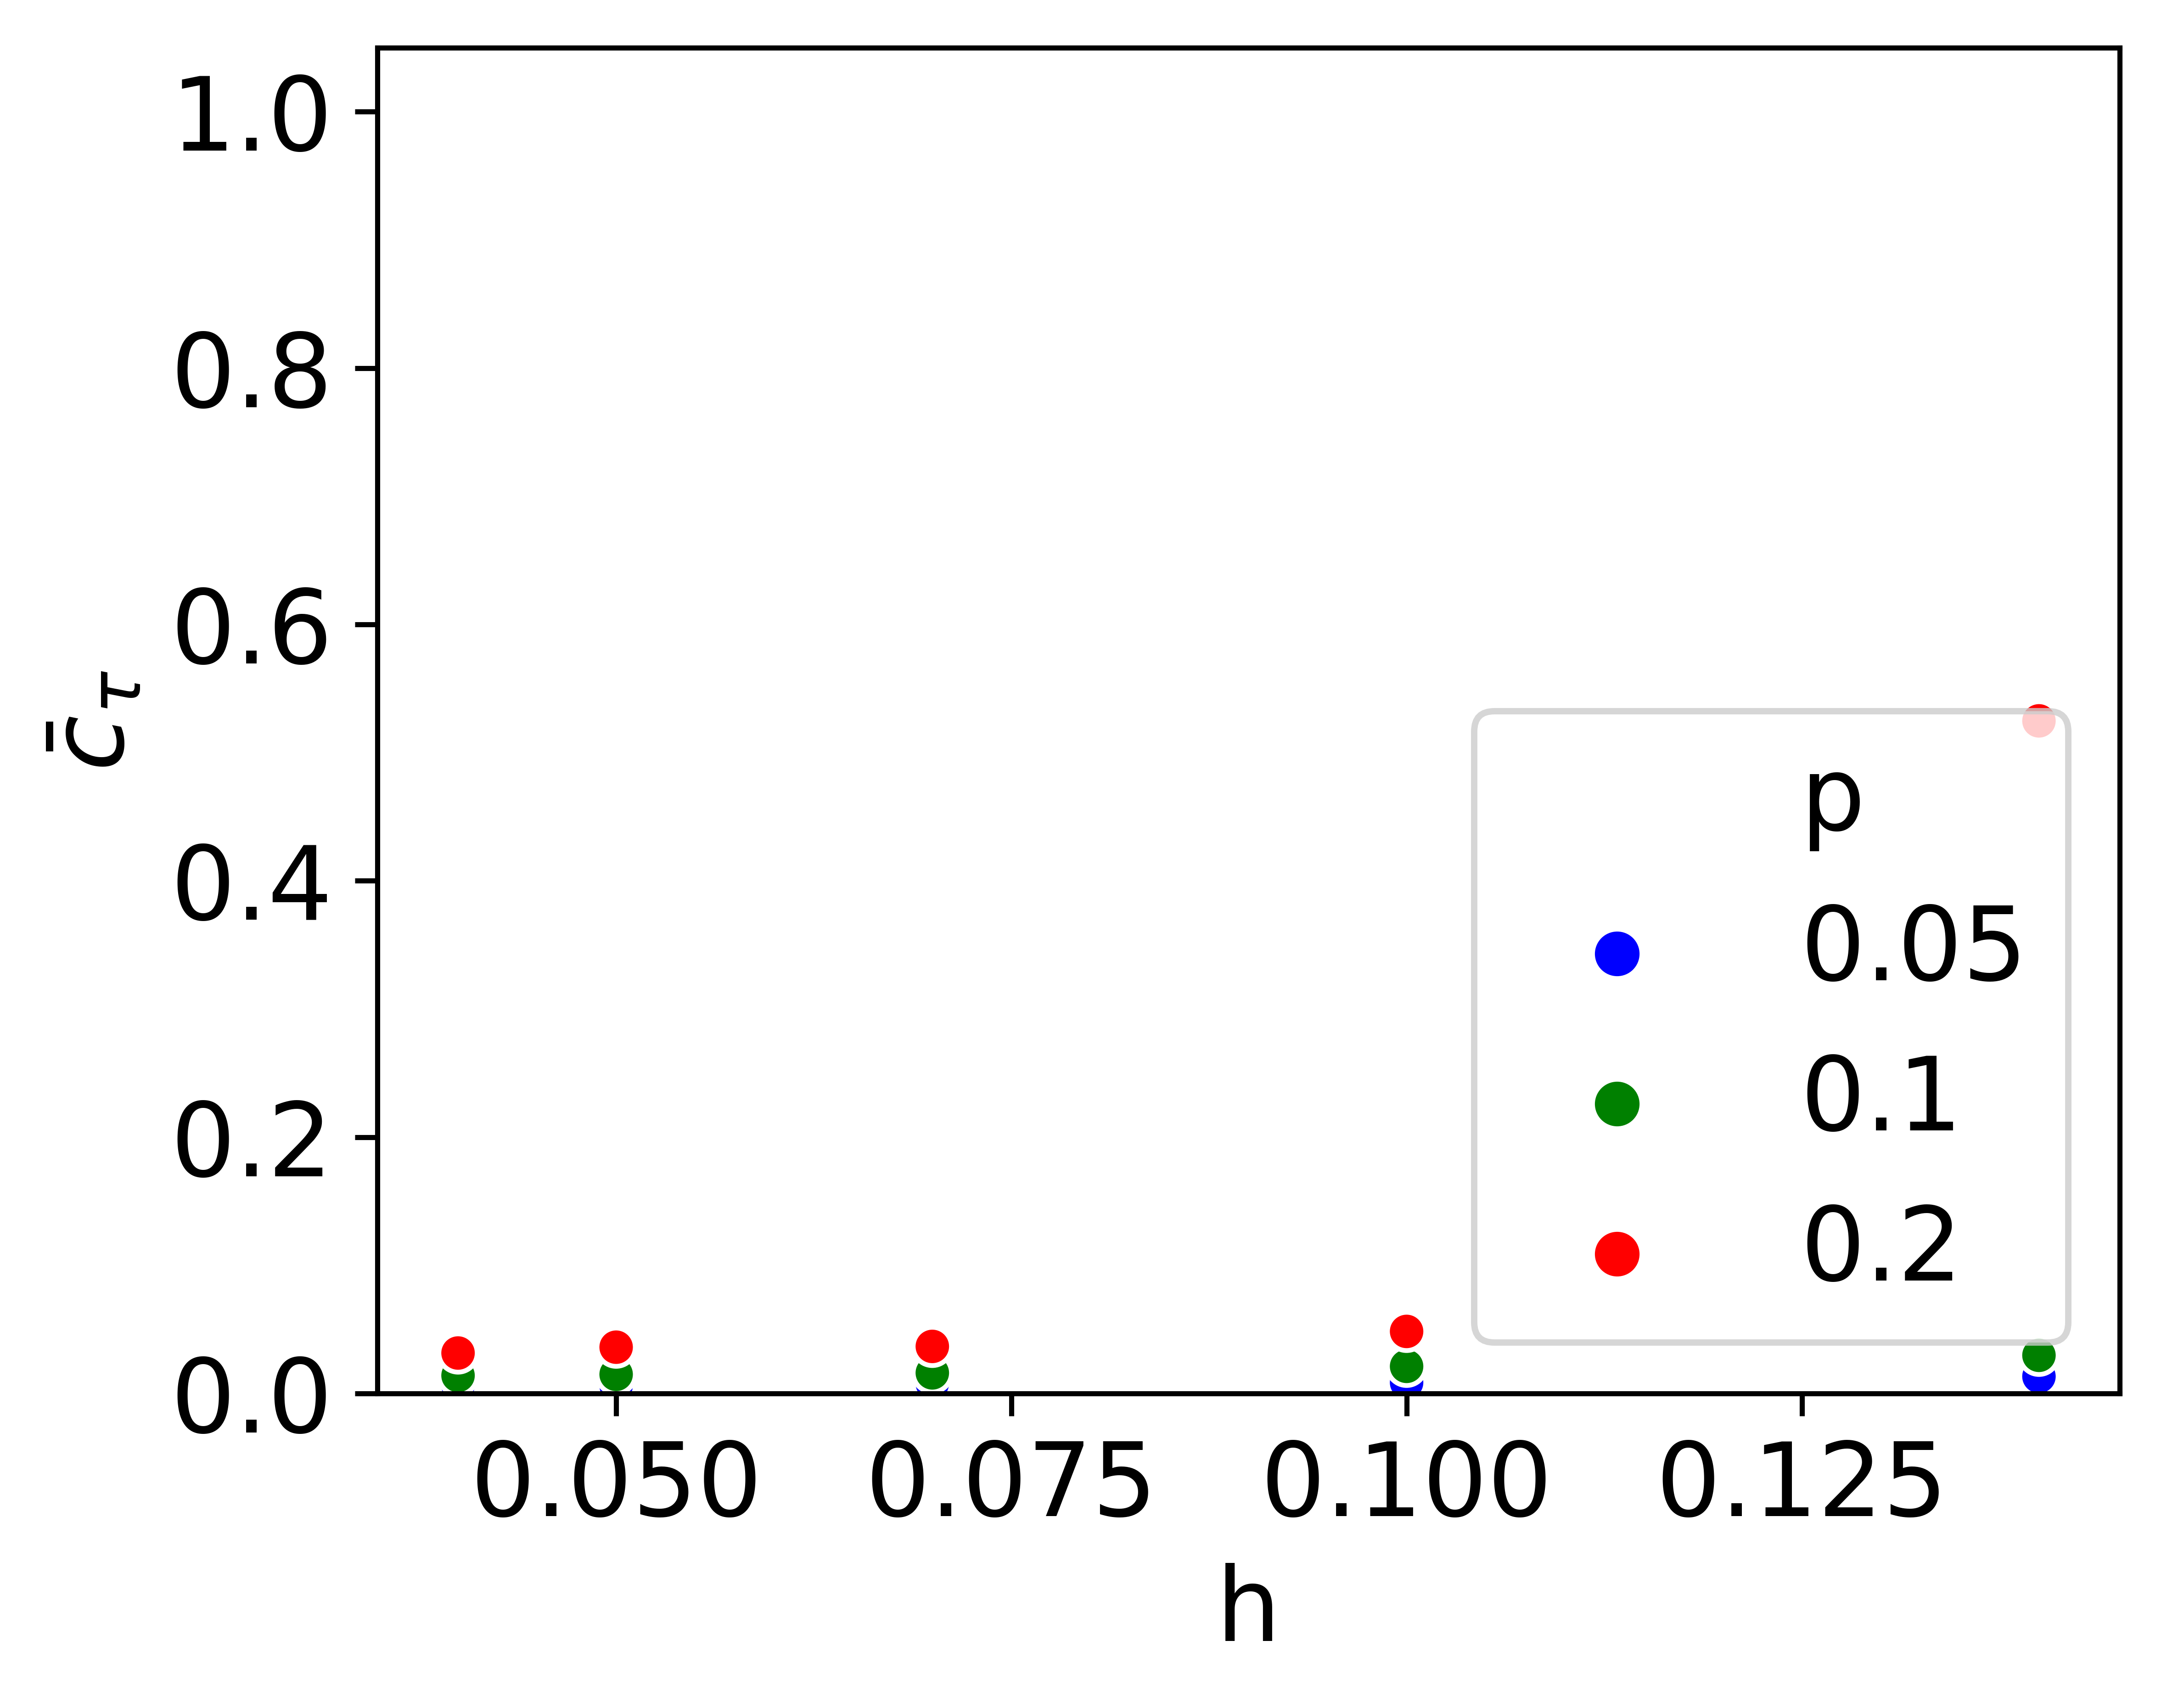

In [12]:
generate_plot(df[df['graph'] == 'complete'])
plt.savefig('results/images/hp-complete.png')

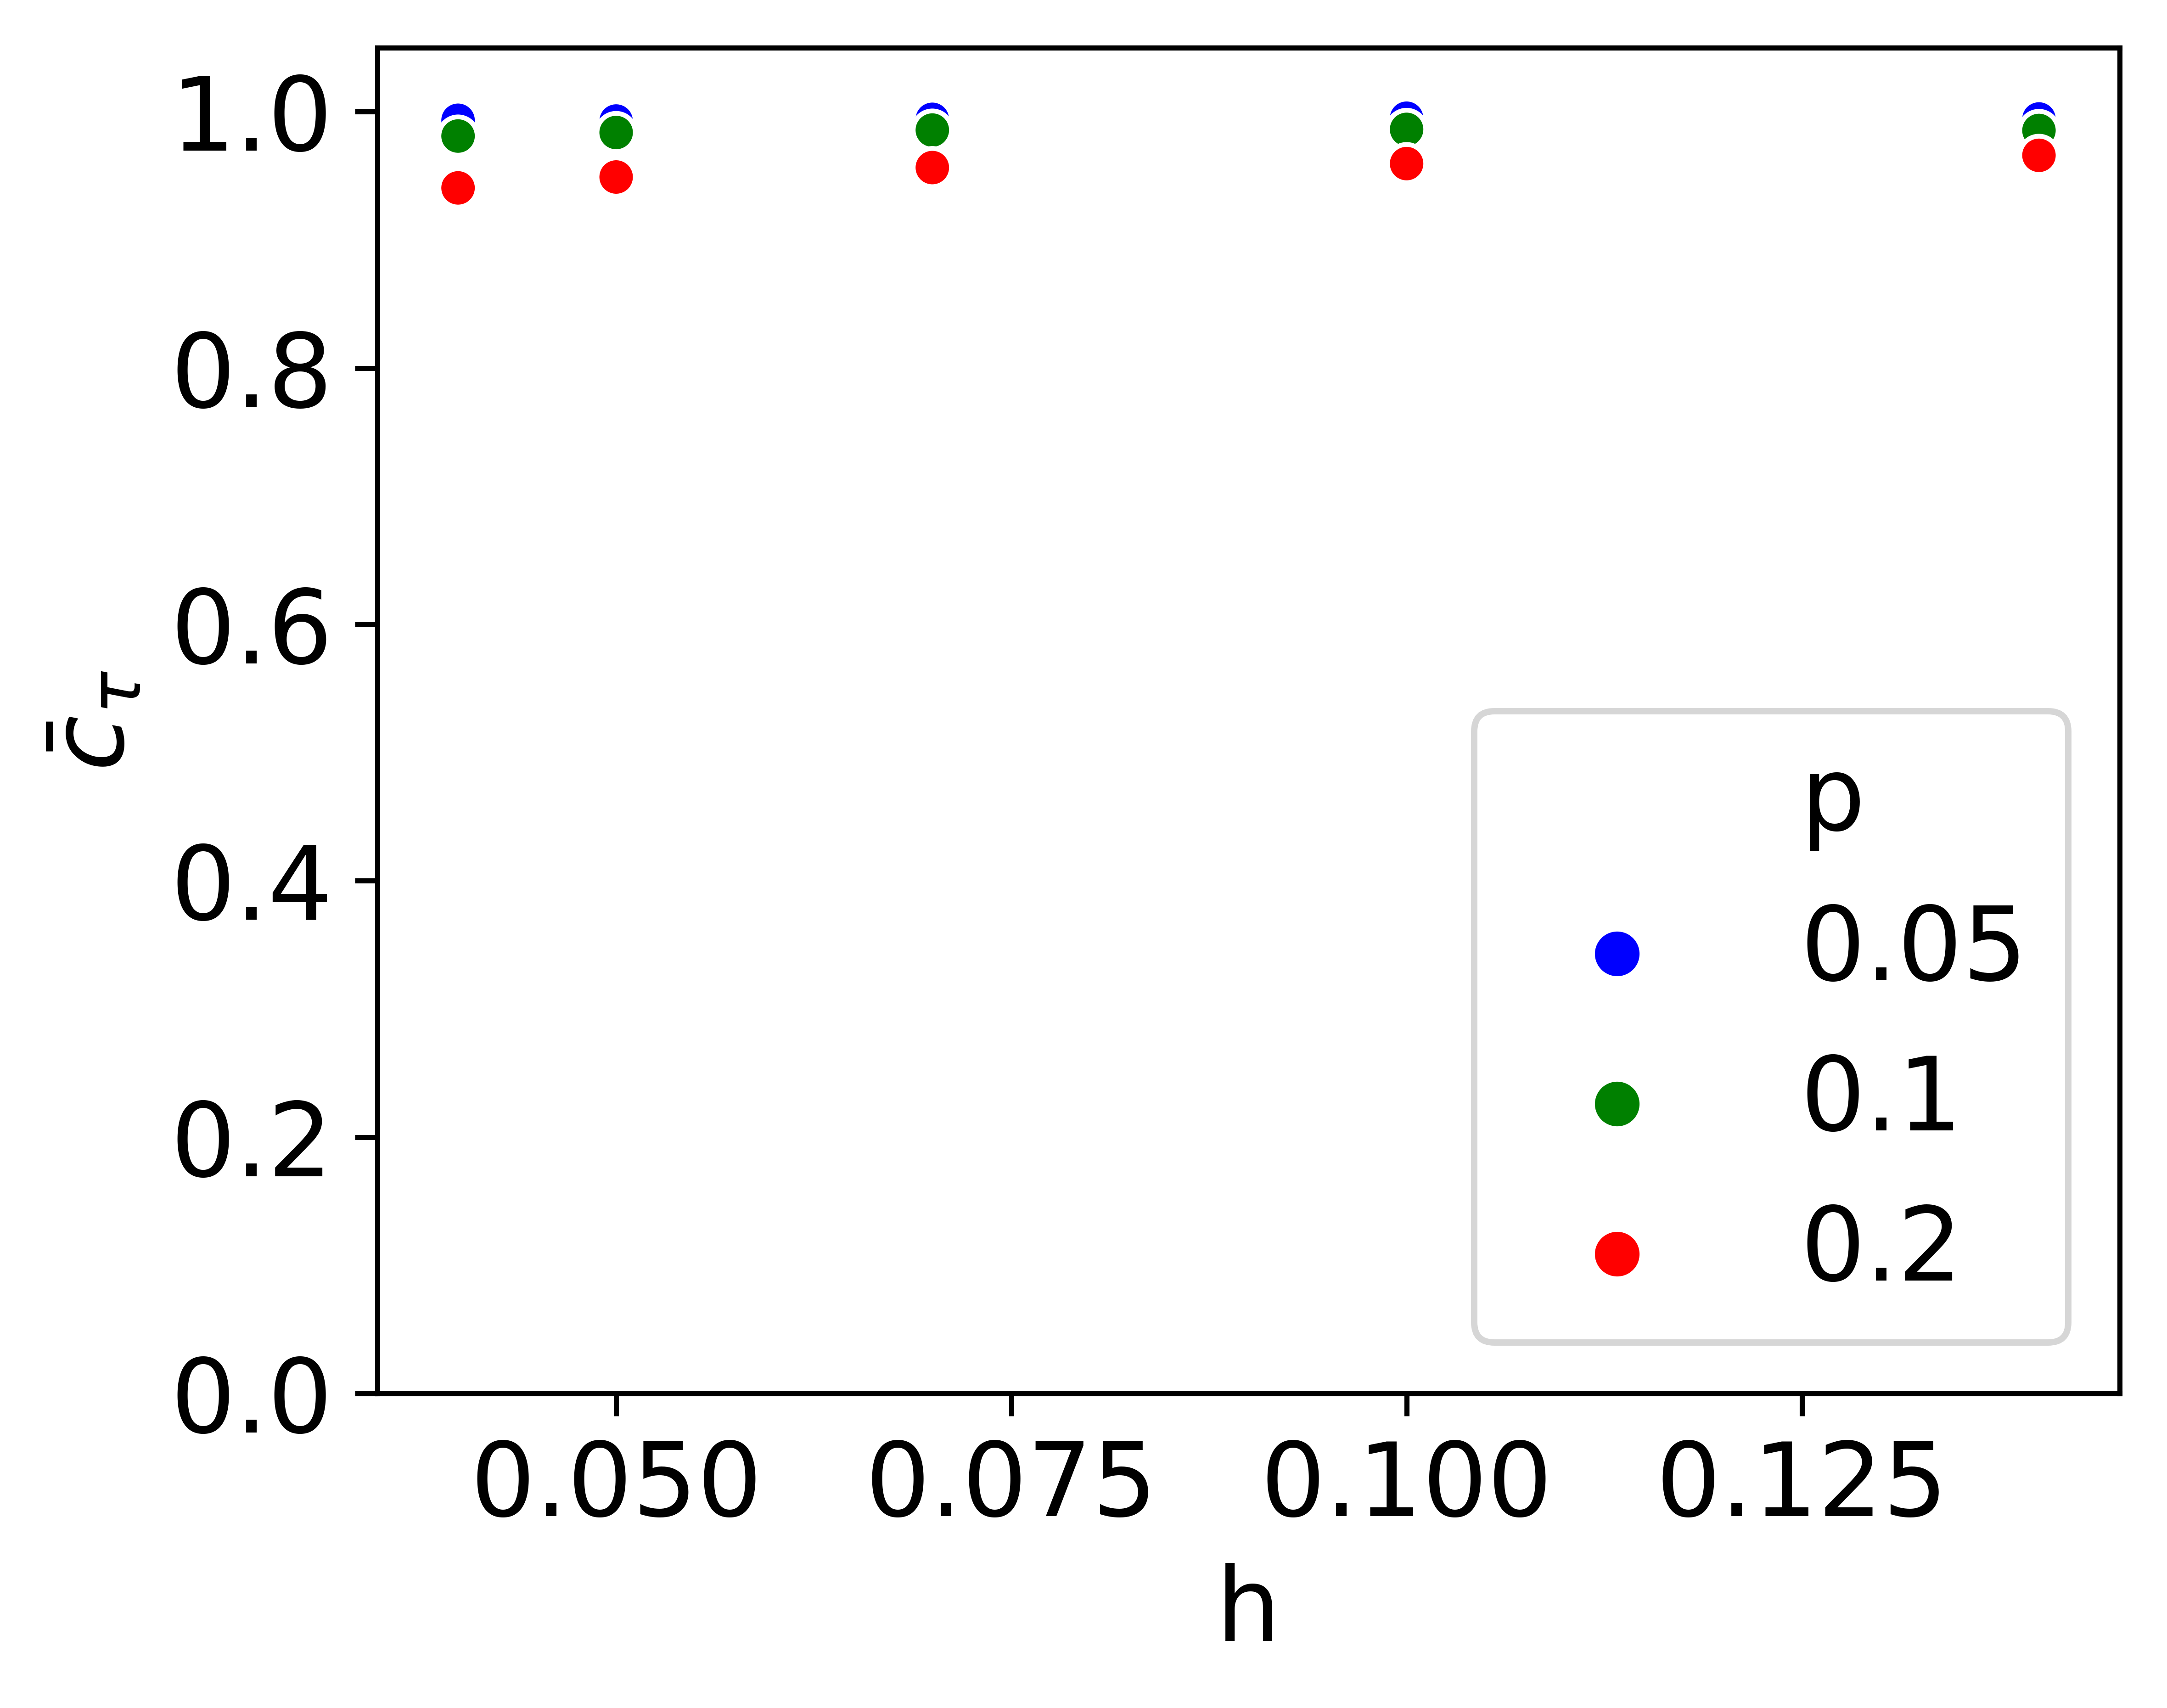

In [13]:
generate_plot(df[df['graph'] == 'WS'])
plt.savefig('results/images/hp-watts-strogatz.png')

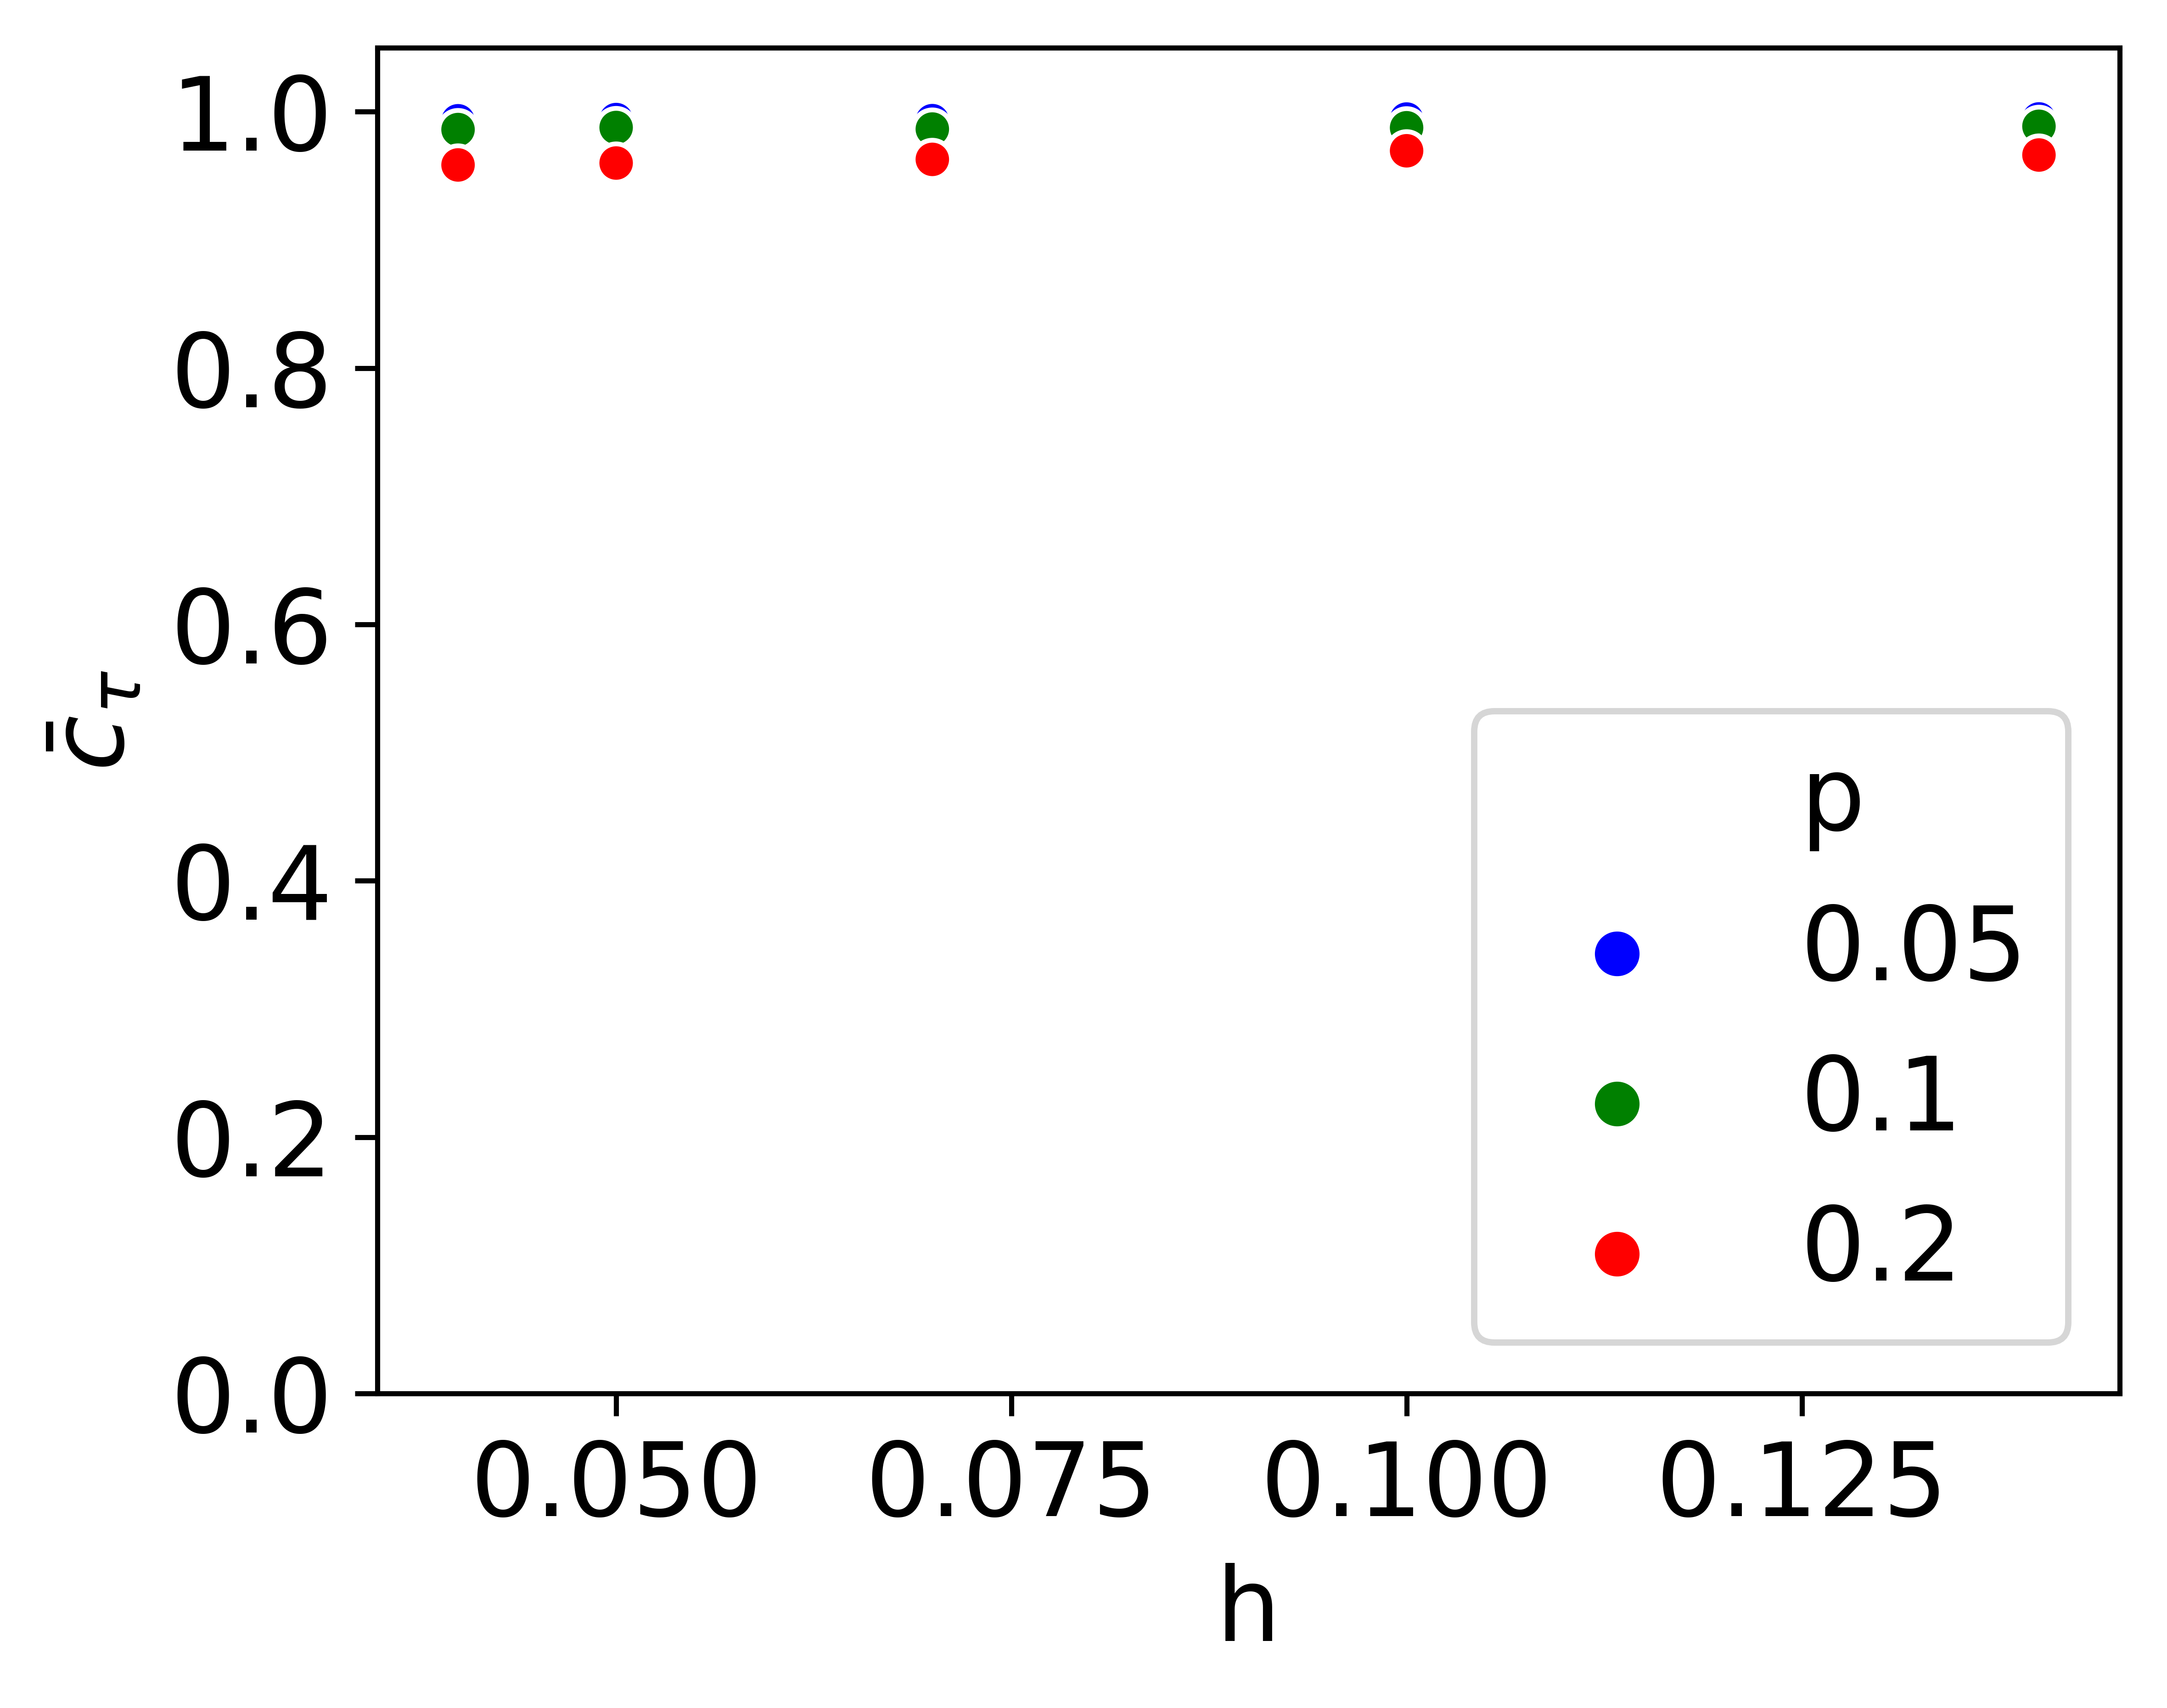

In [14]:
generate_plot(df[df['graph'] == 'BA'])
plt.savefig('results/images/hp-barabasi-albert.png')